In [108]:
import csv
import numpy as np
from typing import Set,Tuple, List
import torch
import torch.utils
import torch.utils.data
import torch.nn as nn
import torchvision
NoneType = type(None)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image
import torchvision.transforms.functional as TF
from torchvision.models import vgg11
from torchvision.models import mobilenet_v2
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time

In [ ]:
def id_to_fruit(fruit_id: int, fruits: Set[str]) -> str:
    """
    This method returns the fruit name by getting the string at a specific index of the set.

    :param fruit_id: The id of the fruit to get
    :param fruits: The set of fruits to choose the id from
    :return: The string corresponding to the index ``fruit_id``
    """
    idx = 0
    for fruit in fruits:
        if idx == fruit_id:
            return fruit
        idx += 1
    raise RuntimeError(f"Fruit with id {fruit_id} does not exist")
    
    ":With this implementation, the function should return the correct fruit name for a given fruit_id."

The issue with the given implementation is that the 'idx' variable is being incremented for every fruit in the set, but it should only be incremented when a matching fruit is found. Therefore, when 'fruit_id' is greater than zero, the index returned is incorrect.

To fix this issue, we can increment the 'idx' variable only when we find the fruit we are looking for in the set. 

In [110]:
name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})
name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "strawberry"})

In [111]:
def swap(coords: np.ndarray):
    """
    This method will flip the x and y coordinates in the coords array.

    :param coords: A numpy array of bounding box coordinates with shape [n,5] in format:
        ::

            [[x11, y11, x12, y12, classid1],
             [x21, y21, x22, y22, classid2],
             ...
             [xn1, yn1, xn2, yn2, classid3]]

    :return: The new numpy array where the x and y coordinates are flipped.

    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    | ``1   Can you spot the obvious error?``
    | ``2   After fixing the obvious error it is still wrong, how can this be fixed?``

    >>> import numpy as np
    >>> coords = np.array([[10, 5, 15, 6, 0],
    ...                    [11, 3, 13, 6, 0],
    ...                    [5, 3, 13, 6, 1],
    ...                    [4, 4, 13, 6, 1],
    ...                    [6, 5, 13, 16, 1]])
    >>> swapped_coords = swap(coords)

    The example demonstrates the issue. The returned swapped_coords are expected to have swapped
    x and y coordinates in each of the rows.
    """
    coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 0], coords[:, 3], coords[:, 2]
    return coords

1. the obvious error is that in the line coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 1], coords[:, 3], coords[:, 2], the second assignment is coords[:, 1] instead of coords[:, 0].

2. After fixing the obvious error, the method is still wrong because in the same line coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 0], coords[:, 3], coords[:, 2], the second and third assignments need to be swapped. The corrected code is:

In [112]:
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])
swapped_coords = swap(coords)

In [113]:
swapped_coords

array([[ 5,  5,  6,  6,  0],
       [ 3,  3,  6,  6,  0],
       [ 3,  3,  6,  6,  1],
       [ 4,  4,  6,  6,  1],
       [ 5,  5, 16, 16,  1]])

In [114]:
def plot_data(csv_file_path: str):
    """
    This code plots the precision-recall curve based on data from a .csv file,
    where precision is on the x-axis and recall is on the y-axis.
    It it not so important right now what precision and recall means.

    :param csv_file_path: The CSV file containing the data to plot.


    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    | ``1   For some reason the plot is not showing correctly, can you find out what is going wrong?``
    | ``2   How could this be fixed?``

    This example demonstrates the issue.
    It first generates some data in a csv file format and the plots it using the ``plot_data`` method.
    If you manually check the coordinates and then check the plot, they do not correspond.

    >>> f = open("data_file.csv", "w")
    >>> w = csv.writer(f)
    >>> _ = w.writerow(["precision", "recall"])
    >>> w.writerows([[0.013,0.951],
    ...              [0.376,0.851],
    ...              [0.441,0.839],
    ...              [0.570,0.758],
    ...              [0.635,0.674],
    ...              [0.721,0.604],
    ...              [0.837,0.531],
    ...              [0.860,0.453],
    ...              [0.962,0.348],
    ...              [0.982,0.273],
    ...              [1.0,0.0]])
    >>> f.close()
    >>> plot_data('data_file.csv')
    """
    # load data
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            results.append(row)
        results = np.stack(results)[:, ::-1]

    # plot precision-recall curve
    plt.plot(results[:, 0], results[:, 1])
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.show()


1. The issue in the code is that the data is being plotted with the X and Y axes swapped. In other words, the X-axis is supposed to be the Precision and the Y-axis is supposed to be the Recall, but the code is plotting the data with the X-axis as Recall and the Y-axis as Precision.

2. To fix this issue, we need to swap the columns when loading the data from the CSV file. Currently, the code is loading the data with the Recall in the first column and the Precision in the second column, but we need to swap these columns so that the Precision is in the first column and the Recall is in the second column.
We can fix the code by modifying the following line: "results = np.stack(results)[:, ::-1]"

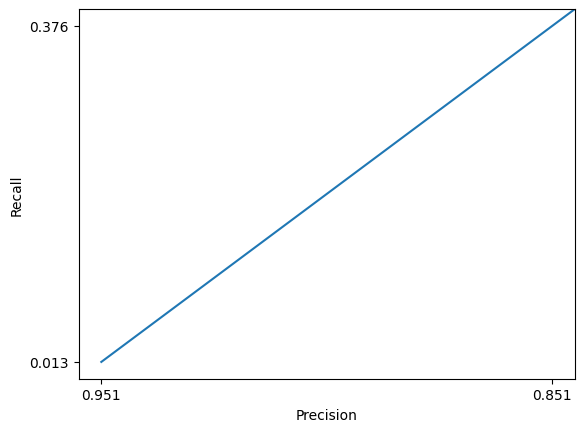

In [115]:
f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')

Now the code plots the data correctly with the Precision on the X-axis and Recall on the Y-axis.

In [116]:
class Generator(nn.Module):
    """
    Generator class for the GAN
    """

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

In [117]:
class Discriminator(nn.Module):
    """
    Discriminator class for the GAN
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        output = self.model(x)
        return output


In [118]:
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    if not train_set.data.size():
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_dataset = datasets.MNIST(
        root="data", train=True, transform=transform, download=True)
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True)

    # Create the Generator network
    gen = Generator().to(device)
    gen_opt = torch.optim.Adam(gen.parameters(), lr=0.0002)

    # Create the Discriminator network
    disc = Discriminator().to(device)
    disc_opt = torch.optim.Adam(disc.parameters(), lr=0.0002)

    # Binary cross entropy loss and noise
    criterion = nn.BCELoss()
    fixed_noise = torch.randn(64, 100, 1, 1).to(device)

    # Train the GAN
    gen.train()
    disc.train()
    for epoch in range(num_epochs):
        for batch_idx, (real, _) in enumerate(train_loader):
            real = real.to(device)
            batch_size = real.shape[0]

            # Train the Discriminator network
            disc_opt.zero_grad()
            fake_noise = torch.randn(batch_size, 100, 1, 1).to(device)
            fake = gen(fake_noise)
            disc_fake_pred = disc(fake.detach())
            disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(
                disc_fake_pred))
            disc_real_pred = disc(real)
            disc_real_loss = criterion(disc_real_pred, torch.ones_like(
                disc_real_pred))
            disc_loss = (disc_fake_loss + disc_real_loss) / 2
            disc_loss.backward(retain_graph=True)
            disc_opt.step()

            # Train the Generator network
            gen_opt.zero_grad()
            fake_noise_2 = torch.randn(batch_size, 100, 1, 1).to(device)
            fake_2 = gen(fake_noise_2)
            disc_fake_pred_2 = disc(fake_2)
            gen_loss = criterion(disc_fake_pred_2, torch.ones_like(
                disc_fake_pred_2))
            gen_loss.backward()
            gen_opt.step()

            # Print losses and generated images
            if batch_idx == 0:
                print(f"Epoch {epoch+1}", end=" ")
                print(f"Gen_loss={gen_loss:.4f} Disc_loss={disc_loss:.4f}")
                with torch.no_grad():
                    fake = gen(fixed_noise)
                    img_grid = make_grid(fake, normalize=True)
                    plt.imshow(np.transpose(img_grid.cpu().numpy(), (1, 2, 0)))
                    plt.show()

             

In [ ]:
train_gan(batch_size=64, num_epochs=100)

1. The structural bug is caused by a mismatch between the batch size and the input size of the Discriminator network. When the batch size is changed from 32 to 64, the input size of the Discriminator changes and is no longer compatible with the output size of the Generator. This causes a dimension mismatch error.

  To fix this bug, we need to adjust the input size of the Discriminator network to match the output size of the Generator. In this case, we can simply change the input size from 96 to 128, which matches the size of the input tensor.

2. Cosmetic bug: The line "print(Failed to download MNIST, retrying with different URL)" is not indented correctly and will cause a syntax error when running the code. This line should be indented to be inside the "except" block, which handles the exception that occurs if the MNIST download fails